## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import *
from statsmodels.formula.api import ols

# SciPy 패키지
from scipy.stats import *  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 통계적 추정

In [2]:
csi = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Csi.csv' )
csi.head(10)

,ID,Index
0,1,75
1,2,63
2,3,49
3,4,86
4,5,53
5,6,80
6,7,70
7,8,72
8,9,81
9,10,80


In [3]:
x = csi.iloc[:,1]

<AxesSubplot:xlabel='Index', ylabel='Density'>

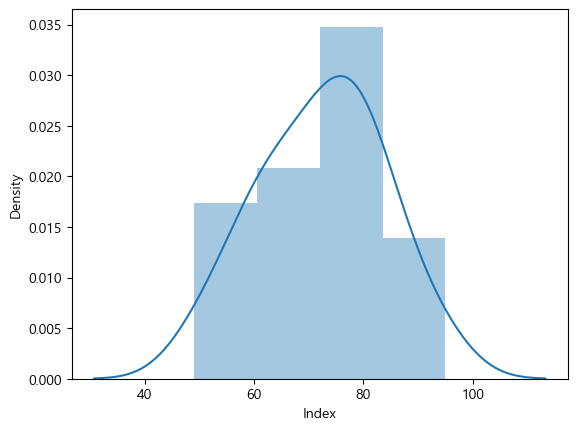

In [4]:
sb.distplot( x )

In [5]:
x.describe()

count    25.00
mean     72.32
std      11.60
min      49.00
25%      63.00
50%      74.00
75%      80.00
max      95.00
Name: Index, dtype: float64

## 모평균에 대한 추정

### statsmodels 패키지 사용
- `statsmodels.stats.weightstats.DescrStatsW()` https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [6]:
# 표본 평균

print('표본 평균 : ', sms.DescrStatsW(x).mean )
print()

표본 평균 :  72.32



In [7]:
# 표준 편차

print('표준편차 (df = n 인 경우) : ', sms.DescrStatsW(x).std )
print()
print('표준편차 (df = n-1 인 경우) : ', sms.DescrStatsW(x, ddof = 1).std )  # df = n - ddof
print()

표준편차 (df = n 인 경우) :  11.365632406513948

표준편차 (df = n-1 인 경우) :  11.600000000000001



In [8]:
# 신뢰 구간

print('< 모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) >\n', sms.DescrStatsW( x ).tconfint_mean() )  # alpha=0.05, alternative='two-sided'
print()
print('< 모평균에 대한 신뢰구간 (모분산이 알려진 경우) >\n', sms.DescrStatsW( x ).zconfint_mean() )  # alpha=0.05, alternative='two-sided'
print()

< 모평균에 대한 신뢰구간 (모분산이 알려지지 않은 경우) >
 (67.53175533702299, 77.108244662977)

< 모평균에 대한 신뢰구간 (모분산이 알려진 경우) >
 (67.77288355586707, 76.86711644413292)



### Numpy, SciPy 패키지 사용
- `scipy.stats.t.ppf()` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [9]:
n = x.size
mean = np.mean(x)
sd = np.std(x, ddof=1) / np.sqrt(n)

limit = t.ppf(0.975, n-1) * sd
print(mean - limit, mean + limit)

67.53175533702299 77.108244662977


In [10]:
# 표본 평균

print('표본 평균 : ', np.mean(x) )
print()

표본 평균 :  72.32



In [11]:
# 표준 편차

print('표준편차 (df = n 인 경우) : ', np.std(x) )
print()
print('표준편차 (df = n-1 인 경우) : ', np.std(x, ddof = 1) )  # df = n - ddof
print()

표준편차 (df = n 인 경우) :  11.365632406513948

표준편차 (df = n-1 인 경우) :  11.600000000000001



In [12]:
# 신뢰 구간

sd = np.std(x, ddof=1) / np.sqrt(n)

limit = t.ppf(0.975, n-1) * sd

print(mean - limit, mean + limit)

67.53175533702299 77.108244662977


## 모비율에 대한 추정

### statsmodels 패키지 사용
- `statsmodels.stats.proportion.proportion_confint()` https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html#statsmodels.stats.proportion.proportion_confint

In [13]:
# 크기가 400개인 표본으로부터 성공횟수가 x일 때의 모비율 추정

n = 400
x = 250

print( "표본비율: p =", x/n )
print()  

# x가 이항분포를 따른다고 가정할 때 : method = 'beta'
print( "모비율에 대한 신뢰구간(이항분포) : ", proportion_confint( x, n, alpha = 0.05, method = 'beta') )  # x가 이항분포를 따른다고 가정할 때 : method = 'beta'
print()

# x가 정규분포를 따른다고 가정할 때 : method = 'normal' (기본값)
print( '모비율에 대한 신뢰구간(정규분포) :', proportion_confint( x, n, alpha = 0.05, method = 'normal') )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(이항분포) :  (0.5755217886614281, 0.6726137612704786)

모비율에 대한 신뢰구간(정규분포) : (0.5775568258044377, 0.6724431741955623)



### Numpy, SciPy 패키지 사용
- `scipy.stats.norm()` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [14]:
n = 400
x = 250
p = x/n

print( "표본비율: p =", x/n )
print()
print( '모비율에 대한 신뢰구간(정규분포) :', norm.interval( 0.95, p, scale = np.sqrt( p*(1-p)/n ) ) )
print()

표본비율: p = 0.625

모비율에 대한 신뢰구간(정규분포) : (0.5775568258044378, 0.6724431741955622)

